In [1]:
import tensorflow as tf
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
imgs="/content/drive/MyDrive/weather"

In [3]:
IMAGE_SIZE=224
BATCH_SIZE=64

#pre=processing
train_datagen=tf.keras.preprocessing.image.ImageDataGenerator(
    rescale=1./255,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    validation_split=0.1
    )

test_datagen=tf.keras.preprocessing.image.ImageDataGenerator(
     rescale=1./255,
     validation_split=0.1
)

train_datagen=train_datagen.flow_from_directory(
    imgs,
    target_size=(IMAGE_SIZE,IMAGE_SIZE),
    batch_size=BATCH_SIZE,
    subset='training'
)

test_datagen=test_datagen.flow_from_directory(
    imgs,
    target_size=(IMAGE_SIZE,IMAGE_SIZE),
    batch_size=BATCH_SIZE,
    subset='validation'
)

Found 1014 images belonging to 4 classes.
Found 111 images belonging to 4 classes.


In [4]:
cnn=tf.keras.Sequential()
cnn.add(tf.keras.layers.Conv2D(filters=64,padding='same',strides=2,kernel_size=3,activation='relu',input_shape=(224,224,3)))
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2,strides=2))

cnn.add(tf.keras.layers.Conv2D(filters=32,padding='same',strides=2,kernel_size=3,activation='relu'))
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2,strides=2))

cnn.add(tf.keras.layers.Conv2D(filters=32,padding='same',strides=2,kernel_size=3,activation='relu'))
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2))

cnn.add(tf.keras.layers.Flatten())
cnn.add(tf.keras.layers.Dense(4,activation='softmax'))

In [5]:
cnn.compile(optimizer=tf.keras.optimizers.Adam(),loss='categorical_crossentropy',metrics=['accuracy'])

In [6]:
history = cnn.fit(train_datagen,epochs=20,validation_data=test_datagen)

Epoch 1/20
16/16 [==============================] - 188s 12s/step - loss: 1.2332 - accuracy: 0.4408 - val_loss: 1.0109 - val_accuracy: 0.5946
Epoch 2/20
16/16 [==============================] - 21s 1s/step - loss: 0.7655 - accuracy: 0.6716 - val_loss: 1.1300 - val_accuracy: 0.5045
Epoch 3/20
16/16 [==============================] - 21s 1s/step - loss: 0.6448 - accuracy: 0.7091 - val_loss: 1.1326 - val_accuracy: 0.5405
Epoch 4/20
16/16 [==============================] - 21s 1s/step - loss: 0.5987 - accuracy: 0.7771 - val_loss: 0.9669 - val_accuracy: 0.6126
Epoch 5/20
16/16 [==============================] - 21s 1s/step - loss: 0.5447 - accuracy: 0.7791 - val_loss: 0.7889 - val_accuracy: 0.6577
Epoch 6/20
16/16 [==============================] - 21s 1s/step - loss: 0.4961 - accuracy: 0.8136 - val_loss: 0.7881 - val_accuracy: 0.7207
Epoch 7/20
16/16 [==============================] - 21s 1s/step - loss: 0.4768 - accuracy: 0.8353 - val_loss: 0.7322 - val_accuracy: 0.7297
Epoch 8/20
16/16 [

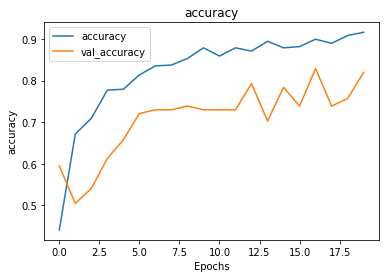

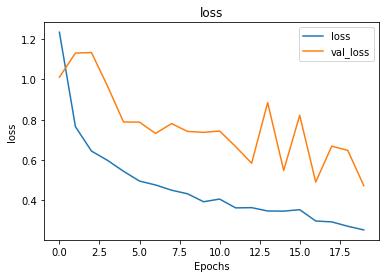

In [7]:
def plot_graphs(history, string):
  plt.plot(history.history[string])
  plt.plot(history.history['val_'+string])
  plt.title(string)
  plt.xlabel("Epochs")
  plt.ylabel(string)
  plt.legend([string, 'val_'+string])
  plt.show()

plot_graphs(history, "accuracy")
plot_graphs(history, "loss")

In [8]:
import os

# testing 

In [9]:
from keras.preprocessing import image
import matplotlib.pyplot as plt
from pathlib import Path

In [12]:
labels = (train_datagen.class_indices)
labels = dict((v , k) for k , v in labels.items())
print(labels)

{0: 'cloudy', 1: 'rain', 2: 'shine', 3: 'sunrise'}


In [15]:
def prediction(test_path):
    import keras
    import tensorflow as tf
    from tensorflow.keras.utils import img_to_array
    image = keras.utils.load_img(test_path, target_size=(224,224,3))
    image_array = img_to_array(image)
    img = np.array(image_array)/255.0

    plt.title('Image')
    plt.axis('off')
    plt.imshow(img.squeeze())

    predict = cnn.predict(img[np.newaxis , ...])
    predicted_class = labels[np.argmax(predict[0] , axis = -1)]

    print('Prediction Value: ' , np.max(predict[0] , axis = -1))
    print("Classified:",predicted_class)

1/1 [==============================] - 0s 22ms/step
Prediction Value:  0.9820842
Classified: rain


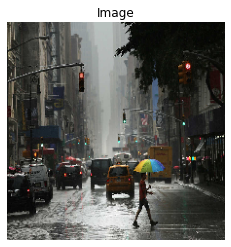

In [16]:
test_path = r"/content/rai.jpg"
prediction(test_path)